<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S6/S6_AssignmentSolution(2ndWay-ModularizedCode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required Libraries**


In [0]:
from __future__ import print_function

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA4B2-TSAI/MNIST Library')

In [0]:
# Import packages from drive
  
from rohan_library import * 
import mnist_execute as execute
import image_transformations
import DataLoaders as loader  
# import visualizeData as viz
import BN_GBN as main
import mnist_utils as utils


load_libs() # loads all the required libraries


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision
import numpy as np
import sys

# since rohan_lib is not working I'll have to do it this way. Later I'll package the same

**Data Transformations**


* Here I've created a Class to transform Train & Test Data. And I'm using Compose function to chain in all the transform operations required in the form of list and then pass it on the different sets of data.
* I have already set the mean and the standard deviation to 0.1307 & 0.3081 
* 2 main parameters normalize(boolean) and rotate(default value = 0).


In [0]:
# Add image transformations for both train & test dataset
channel_means = 0.1307
channel_stdevs = 0.3081
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)
from torchvision import transforms


trainTrans = trans.train_transforms([
                                     transforms.RandomRotation((-10.0, 10.0), fill=(1,))])
                                    #  transforms.RandomHorizontalFlip(p=0.5),
                                    #  transforms.RandomVerticalFlip(p=0.5)

testTrans = trans.test_transforms()

In [0]:
# Split Test & Train Data

from torchvision import datasets


train = datasets.MNIST('./data', train = True, download = True, transform = trainTrans)
test = datasets.MNIST('./data', train = False, download = True, transform = testTrans)

**Dataloaders Arguments & Train/Test Dataloaders**

In [0]:
dl = loader.DataLoaders()
trainloader = dl.dataLoader(train)
testloader = dl.dataLoader(test)

**Data Statistics**

torch.Size([128, 1, 28, 28])
torch.Size([128])


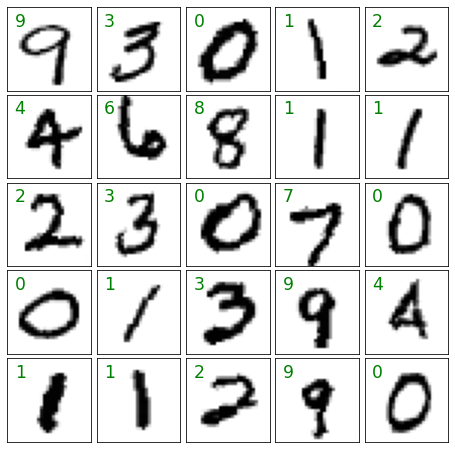

In [10]:

data_iter = iter(trainloader)
images, labels = data_iter.next()

print(images.shape) # [batch_size, 1, 28, 28]
print(labels.shape) # [batch_size]

utils.display_25(images[:25], labels[:25])

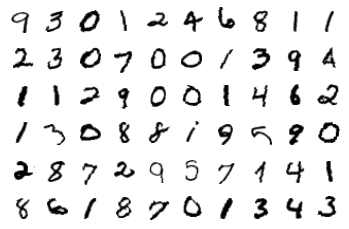

In [11]:
# Just curious at the orientation of these mnist images
import matplotlib.pyplot as plt
figure = plt.figure()
num_of_images = 60
def mnist_data_display(num_of_images):
  for i in range(1,num_of_images+1):
    plt.subplot(6,10, i)
    plt.axis('off')
    plt.imshow(images[i-1].numpy().squeeze(), cmap = 'gray_r')
mnist_data_display(num_of_images)

**Model Summary**

In [11]:
# BN Model Summary 
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = main.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,440
             ReLU-11           [-1, 16, 10, 10]               0
      BatchNorm2d-12           [-1, 16, 10, 10]              32
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 1

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")


BatchNorm_Model = main.BN_Models(device, trainloader, testloader)

BatchNorm_Model.withoutL1_L2_BN()
BatchNorm_Model.withL1_BN()
BatchNorm_Model.withL2_BN()
BatchNorm_Model.withL1_L2_BN()


  0%|          | 0/469 [00:00<?, ?it/s]

without L1 and L2 regularization with BN
with L1 regularization with BN
EPOCH: 1


Loss=0.03424708545207977 Batch_id=468 Accuracy=88.27: 100%|██████████| 469/469 [00:13<00:00, 35.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0816).  Saving model ...

Test set: Average loss: 0.0816, Accuracy: 9753/10000 (97.53%)

EPOCH: 2


Loss=0.03889642655849457 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:13<00:00, 35.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0816 --> 0.0416).  Saving model ...

Test set: Average loss: 0.0416, Accuracy: 9864/10000 (98.64%)

EPOCH: 3


Loss=0.15322856605052948 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:13<00:00, 35.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0416 --> 0.0353).  Saving model ...

Test set: Average loss: 0.0353, Accuracy: 9890/10000 (98.90%)

EPOCH: 4


Loss=0.03330349922180176 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:12<00:00, 36.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0408, Accuracy: 9869/10000 (98.69%)

EPOCH: 5


Loss=0.04168647527694702 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:12<00:00, 36.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0353 --> 0.0293).  Saving model ...

Test set: Average loss: 0.0293, Accuracy: 9891/10000 (98.91%)

EPOCH: 6


Loss=0.04107385873794556 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:12<00:00, 36.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0293 --> 0.0290).  Saving model ...

Test set: Average loss: 0.0290, Accuracy: 9908/10000 (99.08%)

EPOCH: 7


Loss=0.05753067880868912 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:12<00:00, 36.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 9903/10000 (99.03%)

EPOCH: 8


Loss=0.05567747354507446 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:12<00:00, 37.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0290 --> 0.0226).  Saving model ...

Test set: Average loss: 0.0226, Accuracy: 9924/10000 (99.24%)

EPOCH: 9


Loss=0.12579195201396942 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:12<00:00, 38.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9912/10000 (99.12%)

EPOCH: 10


Loss=0.03792978450655937 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:12<00:00, 38.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0256, Accuracy: 9919/10000 (99.19%)

EPOCH: 11


Loss=0.015857644379138947 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:12<00:00, 38.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9926/10000 (99.26%)

EPOCH: 12


Loss=0.07785399258136749 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:12<00:00, 36.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.01497410237789154 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:12<00:00, 38.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0226 --> 0.0209).  Saving model ...

Test set: Average loss: 0.0209, Accuracy: 9940/10000 (99.40%)

EPOCH: 14


Loss=0.045418981462717056 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:12<00:00, 37.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9925/10000 (99.25%)

EPOCH: 15


Loss=0.030886569991707802 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:12<00:00, 38.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 9923/10000 (99.23%)

EPOCH: 16


Loss=0.024363867938518524 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:11<00:00, 39.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0209 --> 0.0193).  Saving model ...

Test set: Average loss: 0.0193, Accuracy: 9938/10000 (99.38%)

EPOCH: 17


Loss=0.015413767658174038 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:12<00:00, 38.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0193 --> 0.0184).  Saving model ...

Test set: Average loss: 0.0184, Accuracy: 9946/10000 (99.46%)

EPOCH: 18


Loss=0.04125528410077095 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:12<00:00, 38.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9942/10000 (99.42%)

EPOCH: 19


Loss=0.06412769109010696 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:12<00:00, 38.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9938/10000 (99.38%)

EPOCH: 20


Loss=0.014157372526824474 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:12<00:00, 38.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0184 --> 0.0181).  Saving model ...

Test set: Average loss: 0.0181, Accuracy: 9944/10000 (99.44%)

EPOCH: 21


Loss=0.017972692847251892 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:12<00:00, 38.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0181 --> 0.0178).  Saving model ...

Test set: Average loss: 0.0178, Accuracy: 9938/10000 (99.38%)

EPOCH: 22


Loss=0.022722696885466576 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:12<00:00, 38.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0178 --> 0.0172).  Saving model ...

Test set: Average loss: 0.0172, Accuracy: 9947/10000 (99.47%)

EPOCH: 23


Loss=0.02728651836514473 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:12<00:00, 38.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0172 --> 0.0162).  Saving model ...

Test set: Average loss: 0.0162, Accuracy: 9944/10000 (99.44%)

EPOCH: 24


Loss=0.014832083135843277 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:12<00:00, 38.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9946/10000 (99.46%)

EPOCH: 25


Loss=0.06860756129026413 Batch_id=468 Accuracy=99.52: 100%|██████████| 469/469 [00:12<00:00, 38.60it/s]



Test set: Average loss: 0.0164, Accuracy: 9946/10000 (99.46%)



  0%|          | 0/469 [00:00<?, ?it/s]

with L2 regularization with BN
EPOCH: 1


Loss=0.12816205620765686 Batch_id=468 Accuracy=85.43: 100%|██████████| 469/469 [00:11<00:00, 40.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0638).  Saving model ...

Test set: Average loss: 0.0638, Accuracy: 9790/10000 (97.90%)

EPOCH: 2


Loss=0.06830411404371262 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:11<00:00, 41.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0638 --> 0.0469).  Saving model ...

Test set: Average loss: 0.0469, Accuracy: 9839/10000 (98.39%)

EPOCH: 3


Loss=0.020622989162802696 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:11<00:00, 41.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0469 --> 0.0458).  Saving model ...

Test set: Average loss: 0.0458, Accuracy: 9862/10000 (98.62%)

EPOCH: 4


Loss=0.052534084767103195 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:11<00:00, 40.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0458 --> 0.0341).  Saving model ...

Test set: Average loss: 0.0341, Accuracy: 9891/10000 (98.91%)

EPOCH: 5


Loss=0.14485301077365875 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:11<00:00, 40.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0341 --> 0.0292).  Saving model ...

Test set: Average loss: 0.0292, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


Loss=0.022570395842194557 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:11<00:00, 40.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0292 --> 0.0281).  Saving model ...

Test set: Average loss: 0.0281, Accuracy: 9911/10000 (99.11%)

EPOCH: 7


Loss=0.038217585533857346 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:11<00:00, 40.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0281 --> 0.0237).  Saving model ...

Test set: Average loss: 0.0237, Accuracy: 9925/10000 (99.25%)

EPOCH: 8


Loss=0.03019041381776333 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:11<00:00, 40.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0251, Accuracy: 9919/10000 (99.19%)

EPOCH: 9


Loss=0.013544146902859211 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:11<00:00, 41.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0237 --> 0.0227).  Saving model ...

Test set: Average loss: 0.0227, Accuracy: 9931/10000 (99.31%)

EPOCH: 10


Loss=0.00808472465723753 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:11<00:00, 41.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 9929/10000 (99.29%)

EPOCH: 11


Loss=0.029915669932961464 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:11<00:00, 40.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0227 --> 0.0211).  Saving model ...

Test set: Average loss: 0.0211, Accuracy: 9937/10000 (99.37%)

EPOCH: 12


Loss=0.060133401304483414 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:11<00:00, 40.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0211 --> 0.0196).  Saving model ...

Test set: Average loss: 0.0196, Accuracy: 9941/10000 (99.41%)

EPOCH: 13


Loss=0.007310668472200632 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:11<00:00, 41.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0196 --> 0.0196).  Saving model ...

Test set: Average loss: 0.0196, Accuracy: 9945/10000 (99.45%)

EPOCH: 14


Loss=0.007588332053273916 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:11<00:00, 41.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0196 --> 0.0186).  Saving model ...

Test set: Average loss: 0.0186, Accuracy: 9940/10000 (99.40%)

EPOCH: 15


Loss=0.008690397255122662 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:11<00:00, 41.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0186 --> 0.0184).  Saving model ...

Test set: Average loss: 0.0184, Accuracy: 9940/10000 (99.40%)

EPOCH: 16


Loss=0.006928563117980957 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:11<00:00, 40.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9939/10000 (99.39%)

EPOCH: 17


Loss=0.012870743870735168 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:11<00:00, 41.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9943/10000 (99.43%)

EPOCH: 18


Loss=0.0050282529555261135 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:11<00:00, 41.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0184 --> 0.0177).  Saving model ...

Test set: Average loss: 0.0177, Accuracy: 9948/10000 (99.48%)

EPOCH: 19


Loss=0.002377912402153015 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:11<00:00, 41.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0177 --> 0.0162).  Saving model ...

Test set: Average loss: 0.0162, Accuracy: 9944/10000 (99.44%)

EPOCH: 20


Loss=0.009153544902801514 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:11<00:00, 40.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0162 --> 0.0151).  Saving model ...

Test set: Average loss: 0.0151, Accuracy: 9954/10000 (99.54%)

EPOCH: 21


Loss=0.0005209247465245426 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:11<00:00, 39.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 9948/10000 (99.48%)

EPOCH: 22


Loss=0.0038295190315693617 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:11<00:00, 39.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0151 --> 0.0150).  Saving model ...

Test set: Average loss: 0.0150, Accuracy: 9957/10000 (99.57%)

EPOCH: 23


Loss=0.026696601882576942 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:12<00:00, 37.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0150 --> 0.0142).  Saving model ...

Test set: Average loss: 0.0142, Accuracy: 9961/10000 (99.61%)

EPOCH: 24


Loss=0.0014083186397328973 Batch_id=468 Accuracy=99.49: 100%|██████████| 469/469 [00:12<00:00, 36.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0142, Accuracy: 9962/10000 (99.62%)

EPOCH: 25


Loss=0.024175459519028664 Batch_id=468 Accuracy=99.52: 100%|██████████| 469/469 [00:12<00:00, 38.22it/s]


Validation loss has  decreased (0.0142 --> 0.0142).  Saving model ...

Test set: Average loss: 0.0142, Accuracy: 9964/10000 (99.64%)



  0%|          | 0/469 [00:00<?, ?it/s]

with L1 & L2 regularization with BN
EPOCH: 1


Loss=0.1570153385400772 Batch_id=468 Accuracy=85.82: 100%|██████████| 469/469 [00:12<00:00, 37.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0628).  Saving model ...

Test set: Average loss: 0.0628, Accuracy: 9805/10000 (98.05%)

EPOCH: 2


Loss=0.09985776990652084 Batch_id=376 Accuracy=97.29:  80%|████████  | 376/469 [00:09<00:02, 39.77it/s]

In [5]:
# Plot Val Accuracy and Loss curve

plots = main.BN_Models(device, trainloader, testloader)
plots.bn_plot_acc('ValAcc_BN')
plots.bn_plot_loss('ValLoss_BN')


NameError: ignored

In [0]:
GhostBatchNorm_Model = main.GBN_Models(device, trainloader, testloader)

GhostBatchNorm_Model.withoutL1_L2_GBN()
GhostBatchNorm_Model.withL1_GBN()
GhostBatchNorm_Model.withL2_GBN()
GhostBatchNorm_Model.withL1_L2_GBN()


**Model 1**
#without L1 and L2 regularization with BN


In [0]:
# def withoutL1_L2_BN():
#   model =  main.Net().to(device)
#   optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#   scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=10)

# #first model
#   print('without L1 and L2 regularization with BN')

#   model1= execute.Test_Train()
#   global loss1
#   global acc1
#   loss1 = model1.test_losses
#   acc1 = model1.test_acc

#   EPOCHS = 10 
#   for epoch in range(1,EPOCHS+1):
#       print("EPOCH:", epoch)
#       model1.train(model, device, trainloader, optimizer, epoch, scheduler)
#       model1.test(model, device, testloader,"model1.pt")



**Model 2**
#with L1 regularization with BN


In [0]:
def withL1_BN():
  model =  main.Net().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=10)

#second model
  print('with L1 regularization with BN')

  model2 = execute.Test_Train()
  global loss2
  global acc2
  loss2 = model2.test_losses
  acc2 = model2.test_acc

  EPOCHS = 10
  for epoch in range(1,EPOCHS+1):
      print("EPOCH:", epoch)
      model2.train(model, device, trainloader, optimizer, epoch, scheduler, L1lambda = 1e-5)
      model2.test(model, device, testloader,"model2.pt")

**Model 3**
#with L2 regularization with BN


In [0]:
def withL2_BN():
  model =  main.Net().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=1e-5)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=10)

#third model
  print('with L2 regularization with BN')

  model3 = execute.Test_Train()
  global loss3
  global acc3
  loss3 = model3.test_losses
  acc3 = model3.test_acc

  EPOCHS = 10
  for epoch in range(1,EPOCHS+1):
      print("EPOCH:", epoch)
      model3.train(model, device, trainloader, optimizer, epoch, scheduler)
      model3.test(model, device, testloader,"model3.pt")

**Model 4**
#with both L1 & L2 regularization with BN


In [0]:
# Model 4

def withL1_L2_BN():
  model = main.Net().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=1e-4)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=10)

  print('with L1 & L2 regularization with BN')
#with both L1 & L2 regularization with BN
  model4 = execute.Test_Train()
  global loss4
  global acc4
  loss4 = model4.test_losses
  acc4 = model4.test_acc

  EPOCHS = 10
  for epoch in range(1,EPOCHS+1):
      print("EPOCH:", epoch)
      model4.train(model, device, trainloader, optimizer, epoch, scheduler, L1lambda = 1e-5)
      model4.test(model, device, testloader,"model4.pt")

In [18]:
modelTuple = iter(withoutL1_L2_BN(),
  withL1_BN(),withL2_BN(), 
  withL1_L2_BN())

 
print(modelTuple.__next__())

  0%|          | 0/469 [00:00<?, ?it/s]

without L1 and L2 regularization with BN
EPOCH: 1


Loss=0.08105655759572983 Batch_id=468 Accuracy=87.80: 100%|██████████| 469/469 [00:22<00:00, 21.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0573).  Saving model ...

Test set: Average loss: 0.0573, Accuracy: 9817/10000 (98.17%)

EPOCH: 2


Loss=0.12883585691452026 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:22<00:00, 21.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0573 --> 0.0367).  Saving model ...

Test set: Average loss: 0.0367, Accuracy: 9887/10000 (98.87%)

EPOCH: 3


Loss=0.04332849010825157 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:22<00:00, 21.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0388, Accuracy: 9876/10000 (98.76%)

EPOCH: 4


Loss=0.006156767252832651 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:22<00:00, 21.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0367 --> 0.0345).  Saving model ...

Test set: Average loss: 0.0345, Accuracy: 9884/10000 (98.84%)

EPOCH: 5


Loss=0.026635775342583656 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0345 --> 0.0279).  Saving model ...

Test set: Average loss: 0.0279, Accuracy: 9922/10000 (99.22%)

EPOCH: 6


Loss=0.07842724025249481 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:22<00:00, 21.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0279 --> 0.0241).  Saving model ...

Test set: Average loss: 0.0241, Accuracy: 9924/10000 (99.24%)

EPOCH: 7


Loss=0.02401687018573284 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0241 --> 0.0209).  Saving model ...

Test set: Average loss: 0.0209, Accuracy: 9930/10000 (99.30%)

EPOCH: 8


Loss=0.01332352589815855 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:22<00:00, 21.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0209 --> 0.0188).  Saving model ...

Test set: Average loss: 0.0188, Accuracy: 9941/10000 (99.41%)

EPOCH: 9


Loss=0.002288222312927246 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0188 --> 0.0180).  Saving model ...

Test set: Average loss: 0.0180, Accuracy: 9942/10000 (99.42%)

EPOCH: 10


Loss=0.03630389645695686 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:22<00:00, 21.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0180 --> 0.0172).  Saving model ...

Test set: Average loss: 0.0172, Accuracy: 9948/10000 (99.48%)

with L1 regularization with BN
EPOCH: 1


Loss=0.0970776230096817 Batch_id=468 Accuracy=86.92: 100%|██████████| 469/469 [00:24<00:00, 19.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0605).  Saving model ...

Test set: Average loss: 0.0605, Accuracy: 9820/10000 (98.20%)

EPOCH: 2


Loss=0.12018825858831406 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:24<00:00, 19.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0605 --> 0.0590).  Saving model ...

Test set: Average loss: 0.0590, Accuracy: 9812/10000 (98.12%)

EPOCH: 3


Loss=0.17896568775177002 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:23<00:00, 19.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0590 --> 0.0371).  Saving model ...

Test set: Average loss: 0.0371, Accuracy: 9881/10000 (98.81%)

EPOCH: 4


Loss=0.12080230563879013 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:23<00:00, 19.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0371 --> 0.0301).  Saving model ...

Test set: Average loss: 0.0301, Accuracy: 9907/10000 (99.07%)

EPOCH: 5


Loss=0.058318670839071274 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:23<00:00, 19.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0301 --> 0.0250).  Saving model ...

Test set: Average loss: 0.0250, Accuracy: 9922/10000 (99.22%)

EPOCH: 6


Loss=0.04071319103240967 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:24<00:00, 19.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0299, Accuracy: 9898/10000 (98.98%)

EPOCH: 7


Loss=0.08086559176445007 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:24<00:00, 19.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0250 --> 0.0239).  Saving model ...

Test set: Average loss: 0.0239, Accuracy: 9922/10000 (99.22%)

EPOCH: 8


Loss=0.046556226909160614 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:23<00:00, 19.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0239 --> 0.0204).  Saving model ...

Test set: Average loss: 0.0204, Accuracy: 9938/10000 (99.38%)

EPOCH: 9


Loss=0.07239143550395966 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:23<00:00, 19.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0204 --> 0.0174).  Saving model ...

Test set: Average loss: 0.0174, Accuracy: 9948/10000 (99.48%)

EPOCH: 10


Loss=0.01994195207953453 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:23<00:00, 19.70it/s]


Validation loss has  decreased (0.0174 --> 0.0174).  Saving model ...

Test set: Average loss: 0.0174, Accuracy: 9949/10000 (99.49%)



  0%|          | 0/469 [00:00<?, ?it/s]

with L2 regularization with BN
EPOCH: 1


Loss=0.13040608167648315 Batch_id=468 Accuracy=86.63: 100%|██████████| 469/469 [00:22<00:00, 21.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0548).  Saving model ...

Test set: Average loss: 0.0548, Accuracy: 9834/10000 (98.34%)

EPOCH: 2


Loss=0.1016448512673378 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:22<00:00, 21.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0548 --> 0.0397).  Saving model ...

Test set: Average loss: 0.0397, Accuracy: 9871/10000 (98.71%)

EPOCH: 3


Loss=0.007439573761075735 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:22<00:00, 21.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0397 --> 0.0370).  Saving model ...

Test set: Average loss: 0.0370, Accuracy: 9880/10000 (98.80%)

EPOCH: 4


Loss=0.05450364574790001 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:22<00:00, 21.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0370 --> 0.0332).  Saving model ...

Test set: Average loss: 0.0332, Accuracy: 9889/10000 (98.89%)

EPOCH: 5


Loss=0.07781635969877243 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:22<00:00, 20.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0332 --> 0.0277).  Saving model ...

Test set: Average loss: 0.0277, Accuracy: 9917/10000 (99.17%)

EPOCH: 6


Loss=0.014530052430927753 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:22<00:00, 21.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0277 --> 0.0230).  Saving model ...

Test set: Average loss: 0.0230, Accuracy: 9918/10000 (99.18%)

EPOCH: 7


Loss=0.0669683888554573 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:21<00:00, 21.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0230 --> 0.0220).  Saving model ...

Test set: Average loss: 0.0220, Accuracy: 9923/10000 (99.23%)

EPOCH: 8


Loss=0.007216548081487417 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0220 --> 0.0184).  Saving model ...

Test set: Average loss: 0.0184, Accuracy: 9942/10000 (99.42%)

EPOCH: 9


Loss=0.013100922107696533 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:22<00:00, 21.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0184 --> 0.0160).  Saving model ...

Test set: Average loss: 0.0160, Accuracy: 9948/10000 (99.48%)

EPOCH: 10


Loss=0.010995646007359028 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0160 --> 0.0156).  Saving model ...

Test set: Average loss: 0.0156, Accuracy: 9946/10000 (99.46%)

with L1 & L2 regularization with BN
EPOCH: 1


Loss=0.14932355284690857 Batch_id=468 Accuracy=87.05: 100%|██████████| 469/469 [00:24<00:00, 19.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0734).  Saving model ...

Test set: Average loss: 0.0734, Accuracy: 9770/10000 (97.70%)

EPOCH: 2


Loss=0.12501588463783264 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:24<00:00, 19.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0734 --> 0.0418).  Saving model ...

Test set: Average loss: 0.0418, Accuracy: 9867/10000 (98.67%)

EPOCH: 3


Loss=0.05439087003469467 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:24<00:00, 19.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0418 --> 0.0338).  Saving model ...

Test set: Average loss: 0.0338, Accuracy: 9885/10000 (98.85%)

EPOCH: 4


Loss=0.026153510436415672 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:24<00:00, 19.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0338 --> 0.0307).  Saving model ...

Test set: Average loss: 0.0307, Accuracy: 9906/10000 (99.06%)

EPOCH: 5


Loss=0.02970580756664276 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:23<00:00, 19.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0307 --> 0.0304).  Saving model ...

Test set: Average loss: 0.0304, Accuracy: 9899/10000 (98.99%)

EPOCH: 6


Loss=0.08735956996679306 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:23<00:00, 19.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0304 --> 0.0303).  Saving model ...

Test set: Average loss: 0.0303, Accuracy: 9908/10000 (99.08%)

EPOCH: 7


Loss=0.0860704854130745 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0303 --> 0.0222).  Saving model ...

Test set: Average loss: 0.0222, Accuracy: 9934/10000 (99.34%)

EPOCH: 8


Loss=0.014234732836484909 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:23<00:00, 19.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0222 --> 0.0196).  Saving model ...

Test set: Average loss: 0.0196, Accuracy: 9942/10000 (99.42%)

EPOCH: 9


Loss=0.019173653796315193 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:23<00:00, 19.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0196 --> 0.0183).  Saving model ...

Test set: Average loss: 0.0183, Accuracy: 9941/10000 (99.41%)

EPOCH: 10


Loss=0.032209329307079315 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]



Test set: Average loss: 0.0183, Accuracy: 9947/10000 (99.47%)



TypeError: ignored

In [11]:
valAcc = main.BN_Models

NameError: ignored

In [0]:
# # Misclassified Images

# from google.colab import files
# def misclassifiedOnes(model, filename):
#   model = model.to(device)
#   dataiter = iter(testloader) 
#   count = 0
#   fig = plt.figure(figsize=(13,13))

#   while count<25:
#       images, labels = dataiter.next()
#       images, labels = images.to(device), labels.to(device)
    
#       output = model(images) 
#       _, pred = torch.max(output, 1)   # convert output probabilities to predicted class
#       images = images.cpu().numpy() # conv images to numpy format

#       for idx in np.arange(128):
#         if pred[idx]!=labels[idx]:
#           ax = fig.add_subplot(5, 5, count+1, xticks=[], yticks=[])
#           count=count+1
#           ax.imshow(np.squeeze(images[idx]), cmap='cool')
#           ax.set_title("Pred-{} (Target-{})".format(str(pred[idx].item()), str(labels[idx].item())), color="Black")
#           if count==25:
#             break
#       plt.savefig(filename)
#   files.download(filename)

   


In [25]:
models = {'model1': 'withoutL1_L2_BN', 'model2': 'withL1_BN', 'model3': 'withL2_BN', 'model4': 'withL1_L2_BN' }

for i in models:
  print('Misclassifed Images from {}'.format(i))
  print('*'*30)

  model.load_state_dict(torch.load(str(i)+ '.pt'))
  utils.misclassifiedOnes(model, filename = str(models[i])+'.png')


Misclassifed Images from model1
******************************


AttributeError: ignored

In [0]:
# GBN Model Summary 
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
modelGBN = main.GBNet().to(device)
summary(modelGBN, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
    GhostBatchNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
    GhostBatchNorm-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,440
             ReLU-11           [-1, 16, 10, 10]               0
   GhostBatchNorm-12           [-1, 16, 10, 10]              32
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 1

In [0]:
# Model 5

def withoutL1_L2_GBN():
  model =  main.GBNet().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=25)

#first model
  print('without L1 and L2 regularization with GBN')
#without L1 and L2 regularization with GBN

  model5= Test_Train()
  global loss5
  global acc5
  loss5 = model5.test_losses
  acc5 = model5.test_acc

  EPOCHS = 25  
  for epoch in range(1,EPOCHS+1):
      print("EPOCH:", epoch)
      model5.train(model, device, trainloader, optimizer, epoch, scheduler)
      model5.test(model, device, testloader,"model5.pt")



In [0]:
# Model 6

def withL1_GBN():
  model =  main.GBNet().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=25)

#sixth model
  print('with L1 regularization with GBN')
#with L1 regularization with BN
  model6 = Test_Train()
  global loss6
  global acc6
  loss6 = model6.test_losses
  acc6 = model6.test_acc

  EPOCHS = 25
  for epoch in range(1,EPOCHS+1):
      print("EPOCH:", epoch)
      model6.train(model, device, trainloader, optimizer, epoch, scheduler, L1lambda = 1e-5)
      model6.test(model, device, testloader,"model6.pt")

In [0]:
#Model 7

def withL2_GBN():
  model =  main.GBNet().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=1e-5)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=25)

#seventh model
  print('with L2 regularization with GBN')
#with L2 regularization 
  model7 = Test_Train()
  global loss7
  global acc7
  loss7 = model7.test_losses
  acc7 = model7.test_acc

  EPOCHS = 25
  for epoch in range(1,EPOCHS+1):
      print("EPOCH:", epoch)
      model7.train(model, device, trainloader, optimizer, epoch, scheduler)
      model7.test(model, device, testloader,"model7.pt")

In [0]:
# Model 8

def withL1_L2_GBN():
  model =  main.GBNet().to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=1e-4)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=25)

#eighth  model
  print('with L1 & L2 regularization with GBN')
#with both L1 & L2 regularization with BN
  model8 = Test_Train()
  global loss8
  global acc8
  loss8 = model8.test_losses
  acc8 = model8.test_acc

  EPOCHS = 25
  for epoch in range(1,EPOCHS+1):
      print("EPOCH:", epoch)
      model8.train(model, device, trainloader, optimizer, epoch, scheduler, L1lambda = 1e-5)
      model8.test(model, device, testloader,"model8.pt")

**Run all 4 models using an iterator**

In [0]:
GBNmodelTuple = iter(withoutL1_L2_GBN(),
  withL1_GBN(), withL2_GBN(),
  withL1_L2_GBN())

# But one problem we've split the this into two model5 & model6, model7 & model8

print(GBNmodelTuple.__next__())

  0%|          | 0/469 [00:00<?, ?it/s]

without L1 and L2 regularization with GBN
EPOCH: 1


Loss=0.0814695879817009 Batch_id=468 Accuracy=85.10: 100%|██████████| 469/469 [00:11<00:00, 40.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0801).  Saving model ...

Test set: Average loss: 0.0801, Accuracy: 9737/10000 (97.37%)

EPOCH: 2


Loss=0.0984615907073021 Batch_id=468 Accuracy=97.42: 100%|██████████| 469/469 [00:11<00:00, 40.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0801 --> 0.0419).  Saving model ...

Test set: Average loss: 0.0419, Accuracy: 9865/10000 (98.65%)

EPOCH: 3


Loss=0.11294104903936386 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:11<00:00, 39.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0419 --> 0.0381).  Saving model ...

Test set: Average loss: 0.0381, Accuracy: 9881/10000 (98.81%)

EPOCH: 4


Loss=0.10795894265174866 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:11<00:00, 39.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0381 --> 0.0358).  Saving model ...

Test set: Average loss: 0.0358, Accuracy: 9885/10000 (98.85%)

EPOCH: 5


Loss=0.03216846287250519 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:11<00:00, 40.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0358 --> 0.0332).  Saving model ...

Test set: Average loss: 0.0332, Accuracy: 9894/10000 (98.94%)

EPOCH: 6


Loss=0.007391984108835459 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:11<00:00, 40.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0332 --> 0.0286).  Saving model ...

Test set: Average loss: 0.0286, Accuracy: 9905/10000 (99.05%)

EPOCH: 7


Loss=0.054964419454336166 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:11<00:00, 40.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0286 --> 0.0261).  Saving model ...

Test set: Average loss: 0.0261, Accuracy: 9921/10000 (99.21%)

EPOCH: 8


Loss=0.10581499338150024 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:11<00:00, 40.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9900/10000 (99.00%)

EPOCH: 9


Loss=0.06410770863294601 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:11<00:00, 40.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0261 --> 0.0248).  Saving model ...

Test set: Average loss: 0.0248, Accuracy: 9921/10000 (99.21%)

EPOCH: 10


Loss=0.05590694770216942 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:11<00:00, 39.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0248 --> 0.0217).  Saving model ...

Test set: Average loss: 0.0217, Accuracy: 9932/10000 (99.32%)

EPOCH: 11


Loss=0.07136809080839157 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:11<00:00, 40.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0290, Accuracy: 9915/10000 (99.15%)

EPOCH: 12


Loss=0.004643345717340708 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:11<00:00, 39.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 9901/10000 (99.01%)

EPOCH: 13


Loss=0.07074104249477386 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:11<00:00, 39.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9929/10000 (99.29%)

EPOCH: 14


Loss=0.006821423768997192 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:11<00:00, 39.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9935/10000 (99.35%)

EPOCH: 15


Loss=0.003962228540331125 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:11<00:00, 39.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0217 --> 0.0206).  Saving model ...

Test set: Average loss: 0.0206, Accuracy: 9932/10000 (99.32%)

EPOCH: 16


Loss=0.014821703545749187 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:11<00:00, 39.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0206 --> 0.0188).  Saving model ...

Test set: Average loss: 0.0188, Accuracy: 9941/10000 (99.41%)

EPOCH: 17


Loss=0.016631240025162697 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:11<00:00, 39.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0188 --> 0.0185).  Saving model ...

Test set: Average loss: 0.0185, Accuracy: 9938/10000 (99.38%)

EPOCH: 18


Loss=0.019021570682525635 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:11<00:00, 40.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0185 --> 0.0168).  Saving model ...

Test set: Average loss: 0.0168, Accuracy: 9939/10000 (99.39%)

EPOCH: 19


Loss=0.02037821151316166 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:11<00:00, 39.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

EPOCH: 20


Loss=0.008211612701416016 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:11<00:00, 39.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9945/10000 (99.45%)

EPOCH: 21


Loss=0.02681061625480652 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:11<00:00, 39.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0168 --> 0.0161).  Saving model ...

Test set: Average loss: 0.0161, Accuracy: 9949/10000 (99.49%)

EPOCH: 22


Loss=0.0008177608251571655 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:12<00:00, 39.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9945/10000 (99.45%)

EPOCH: 23


Loss=0.00044955810881219804 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:11<00:00, 39.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0161 --> 0.0155).  Saving model ...

Test set: Average loss: 0.0155, Accuracy: 9952/10000 (99.52%)

EPOCH: 24


Loss=0.0036856234073638916 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:12<00:00, 39.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0155 --> 0.0148).  Saving model ...

Test set: Average loss: 0.0148, Accuracy: 9953/10000 (99.53%)

EPOCH: 25


Loss=0.006543720606714487 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:11<00:00, 39.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0148, Accuracy: 9954/10000 (99.54%)

with L1 regularization with GBN
EPOCH: 1


Loss=0.18094760179519653 Batch_id=468 Accuracy=86.05: 100%|██████████| 469/469 [00:12<00:00, 36.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0688).  Saving model ...

Test set: Average loss: 0.0688, Accuracy: 9796/10000 (97.96%)

EPOCH: 2


Loss=0.020387055352330208 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:13<00:00, 35.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0688 --> 0.0494).  Saving model ...

Test set: Average loss: 0.0494, Accuracy: 9837/10000 (98.37%)

EPOCH: 3


Loss=0.1741466224193573 Batch_id=468 Accuracy=97.81: 100%|██████████| 469/469 [00:13<00:00, 34.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0494 --> 0.0380).  Saving model ...

Test set: Average loss: 0.0380, Accuracy: 9888/10000 (98.88%)

EPOCH: 4


Loss=0.09032464027404785 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:13<00:00, 34.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0380 --> 0.0372).  Saving model ...

Test set: Average loss: 0.0372, Accuracy: 9880/10000 (98.80%)

EPOCH: 5


Loss=0.053133122622966766 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:13<00:00, 35.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0372 --> 0.0355).  Saving model ...

Test set: Average loss: 0.0355, Accuracy: 9879/10000 (98.79%)

EPOCH: 6


Loss=0.0721706673502922 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:13<00:00, 35.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0355 --> 0.0247).  Saving model ...

Test set: Average loss: 0.0247, Accuracy: 9925/10000 (99.25%)

EPOCH: 7


Loss=0.05293235182762146 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:13<00:00, 35.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0290, Accuracy: 9908/10000 (99.08%)

EPOCH: 8


Loss=0.04835682734847069 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:13<00:00, 35.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9924/10000 (99.24%)

EPOCH: 9


Loss=0.053730569779872894 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:13<00:00, 35.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9919/10000 (99.19%)

EPOCH: 10


Loss=0.01458654087036848 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:13<00:00, 35.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0247 --> 0.0230).  Saving model ...

Test set: Average loss: 0.0230, Accuracy: 9931/10000 (99.31%)

EPOCH: 11


Loss=0.1050981804728508 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:13<00:00, 35.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 9910/10000 (99.10%)

EPOCH: 12


Loss=0.04074535518884659 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:13<00:00, 35.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0230 --> 0.0222).  Saving model ...

Test set: Average loss: 0.0222, Accuracy: 9921/10000 (99.21%)

EPOCH: 13


Loss=0.03232959657907486 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:13<00:00, 35.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0222 --> 0.0201).  Saving model ...

Test set: Average loss: 0.0201, Accuracy: 9934/10000 (99.34%)

EPOCH: 14


Loss=0.016737209632992744 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:13<00:00, 35.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9931/10000 (99.31%)

EPOCH: 15


Loss=0.09501675516366959 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:15<00:00, 29.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0201 --> 0.0181).  Saving model ...

Test set: Average loss: 0.0181, Accuracy: 9949/10000 (99.49%)

EPOCH: 16


Loss=0.02240004390478134 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:13<00:00, 33.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0181 --> 0.0173).  Saving model ...

Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

EPOCH: 17


Loss=0.09726652503013611 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:13<00:00, 34.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9935/10000 (99.35%)

EPOCH: 18


Loss=0.03510399907827377 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:13<00:00, 34.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9941/10000 (99.41%)

EPOCH: 19


Loss=0.01753096655011177 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:13<00:00, 34.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0173 --> 0.0168).  Saving model ...

Test set: Average loss: 0.0168, Accuracy: 9946/10000 (99.46%)

EPOCH: 20


Loss=0.0528959222137928 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:13<00:00, 35.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9940/10000 (99.40%)

EPOCH: 21


Loss=0.05879572033882141 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 35.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0168 --> 0.0151).  Saving model ...

Test set: Average loss: 0.0151, Accuracy: 9953/10000 (99.53%)

EPOCH: 22


Loss=0.017886724323034286 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 35.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0151 --> 0.0148).  Saving model ...

Test set: Average loss: 0.0148, Accuracy: 9952/10000 (99.52%)

EPOCH: 23


Loss=0.05591578781604767 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:13<00:00, 34.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 9953/10000 (99.53%)

EPOCH: 24


Loss=0.01764201745390892 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:13<00:00, 35.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0148, Accuracy: 9954/10000 (99.54%)

EPOCH: 25


Loss=0.015780432149767876 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:13<00:00, 35.36it/s]


Validation loss has  decreased (0.0148 --> 0.0147).  Saving model ...

Test set: Average loss: 0.0147, Accuracy: 9954/10000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]

with L2 regularization with GBN
EPOCH: 1


Loss=0.11682453006505966 Batch_id=468 Accuracy=84.43: 100%|██████████| 469/469 [00:16<00:00, 29.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0599).  Saving model ...

Test set: Average loss: 0.0599, Accuracy: 9814/10000 (98.14%)

EPOCH: 2


Loss=0.05144048109650612 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:13<00:00, 35.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0599 --> 0.0424).  Saving model ...

Test set: Average loss: 0.0424, Accuracy: 9859/10000 (98.59%)

EPOCH: 3


Loss=0.016827881336212158 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:12<00:00, 37.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0424 --> 0.0306).  Saving model ...

Test set: Average loss: 0.0306, Accuracy: 9900/10000 (99.00%)

EPOCH: 4


Loss=0.03324195370078087 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:12<00:00, 37.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0390, Accuracy: 9864/10000 (98.64%)

EPOCH: 5


Loss=0.027546893805265427 Batch_id=266 Accuracy=98.30:  56%|█████▋    | 264/469 [00:07<00:05, 40.22it/s]

In [0]:
# Validation Accuracy 

class plots(Test_Train):
  def __init__(self):
    pass
  
  def validationAcc(self, accValues = [], GBN=False):
    self.accValues = accValues
    self.GBN = GBN

    if self.GBN:
      plotTitle = "with Ghost Batch-Normalization"
      figname = 'withGBN.png'
    else:
      plotTitle = "with Batch-Normalization"
      figname = "withBN.png"


    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    ax.plot(accValues[0])
    ax.plot(accValues[1])
    ax.plot(accValues[2])
    ax.plot(accValues[3])
    ax.set(title="Validation Accuracy of 4 Models"+str(plotTitle), xlabel="Epoch", ylabel="Accuracy")
    ax.legend(['without L1 and L2', 'with L1', 'with L2', 'with L1 and L2'], loc='best')
    plt.savefig(str(figname))
    plt.show()


  def validationLoss(self, lossValues = []):
    self.lossValues = lossValues
    plt.figure(figsize = (15,10))
    ax = plt.subplot(111)
    ax.plot(lossValues[0])
    ax.plot(lossValues[1])
    ax.plot(lossValues[2])
    ax.plot(lossValues[3])
    ax.set(title="Validation Loss of 4 Models"+str(plotTitle), xlabel='Epoch', ylabel = 'Loss')
    ax.legend(['without L1 & L2', 'with L1', 'with L2', 'with L1 & L2'], loc = 'best')
    plt.savefig(str(figname))
    plt.show()

    


c = plots()
c.validationAcc([acc5, acc6, acc7, acc8])
c.validationLoss([loss5, loss6, loss7, loss8])

NameError: ignored

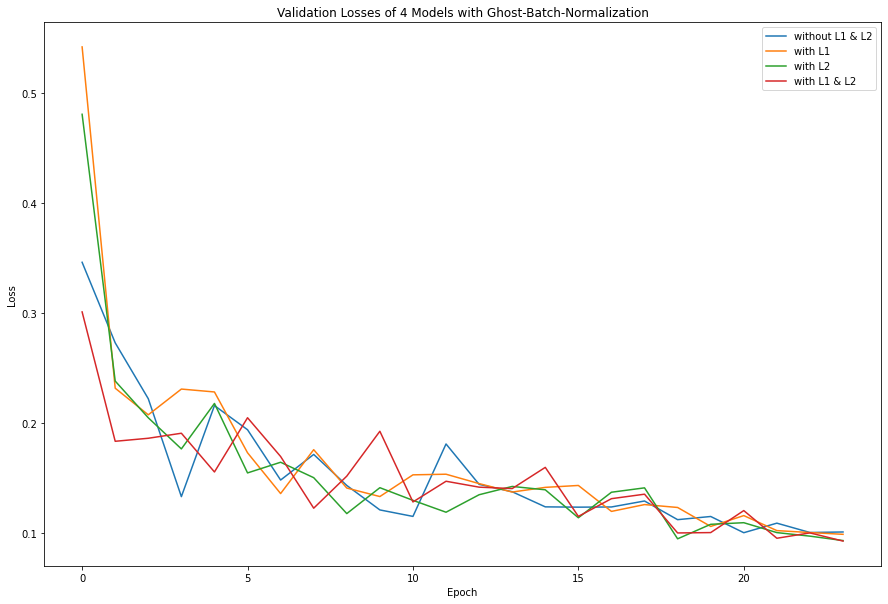

In [0]:
# Validation Loss

class loss_plot(Test_Train):
  def __init__(self):
    plt.figure(figsize = (15,10))
    ax = plt.subplot(111)
    ax.plot(loss5[:-1])
    ax.plot(loss6[:-1])
    ax.plot(loss7[:-1])
    ax.plot(loss8[:-1])
    ax.set(title='Validation Losses of 4 Models with Ghost-Batch-Normalization', xlabel='Epoch', ylabel = 'Loss')
    ax.legend(['without L1 & L2', 'with L1', 'with L2', 'with L1 & L2'], loc = 'best')
    plt.savefig('ValidationLossesGBN.png')
    plt.show()

e = loss_plot()
e


Misclassifed Images from model5
******************************
Misclassifed Images from model6
******************************
Misclassifed Images from model7
******************************
Misclassifed Images from model8
******************************


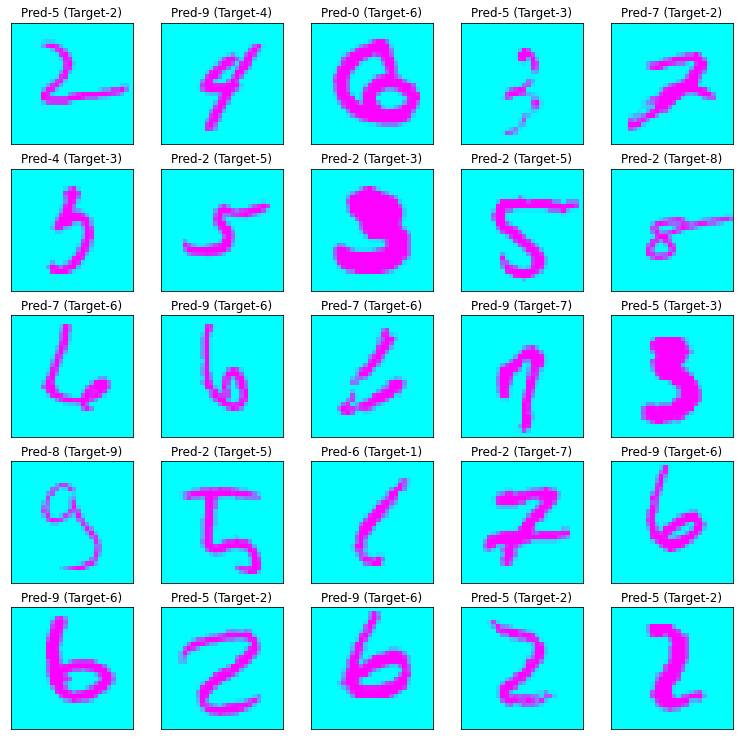

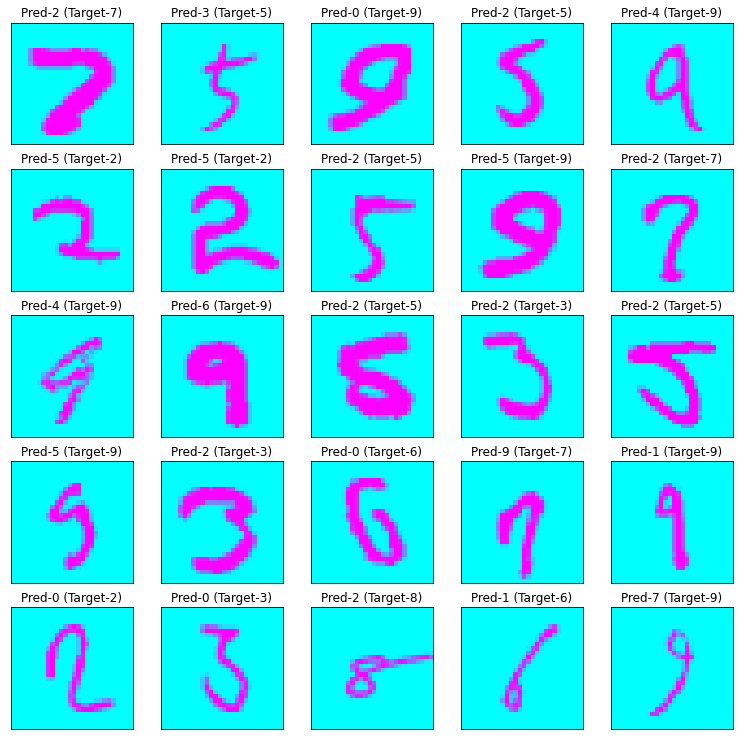

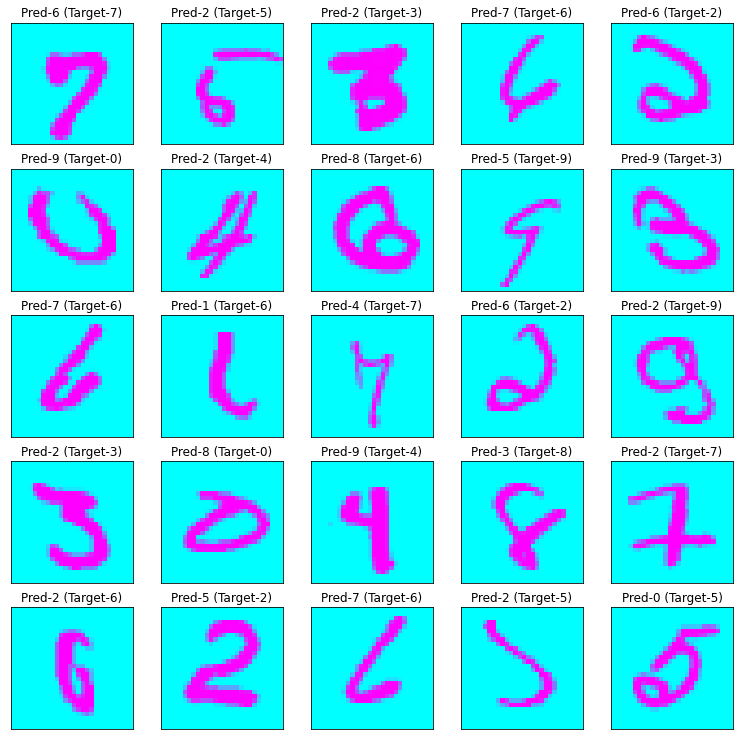

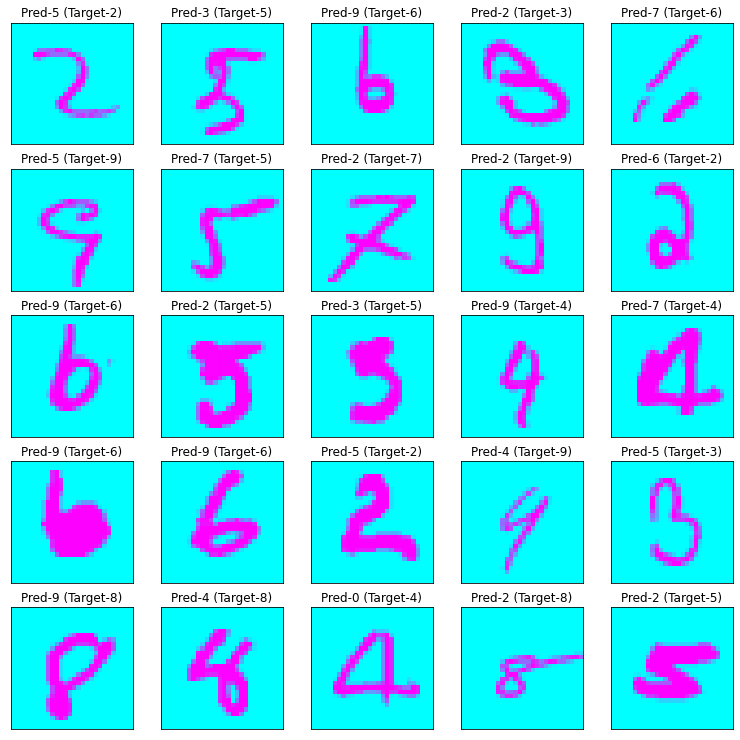

In [0]:
GBNmodels = {'model5': 'withoutL1_L2_GBN', 'model6': 'withL1_GBN', 'model7': 'withL2_GBN', 'model8': 'withL1_L2_GBN' }

for i in GBNmodels:
  print('Misclassifed Images from {}'.format(i))
  print('*'*30)

  model.load_state_dict(torch.load(str(i)+ '.pt'))
  misclassifiedOnes(model, filename = str(GBNmodels[i])+'.png')
